# Explore here

In [70]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

archivo="https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"

df_original = pd.read_csv(archivo, sep=",")
df = pd.read_csv(archivo, sep=",")

df.head()

datos,atributos=df.shape
print(f"Contamos con {datos} cantidad de datos y {atributos} atributos.")
print()

# Valores duplicados

duplicados = df.duplicated()
num_duplicados = duplicados.sum()

print(f"Contamos con {num_duplicados} dato duplicado.")
print()

df.info()

Contamos con 48895 cantidad de datos y 16 atributos.

Contamos con 0 dato duplicado.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_

In [71]:
#eliminar variables que no son relevantes para el proceso predictivo
df.drop(["id", "host_id", "host_name","latitude","longitude","name"], axis = 1, inplace = True)
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [72]:
#para variable categorica (no numerica)
df.neighbourhood.value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [73]:
df.last_review.value_counts()

last_review
2019-06-23    1413
2019-07-01    1359
2019-06-30    1341
2019-06-24     875
2019-07-07     718
              ... 
2017-01-12       1
2011-12-28       1
2017-10-05       1
2018-01-29       1
2018-03-29       1
Name: count, Length: 1764, dtype: int64

In [74]:
df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [75]:
df.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

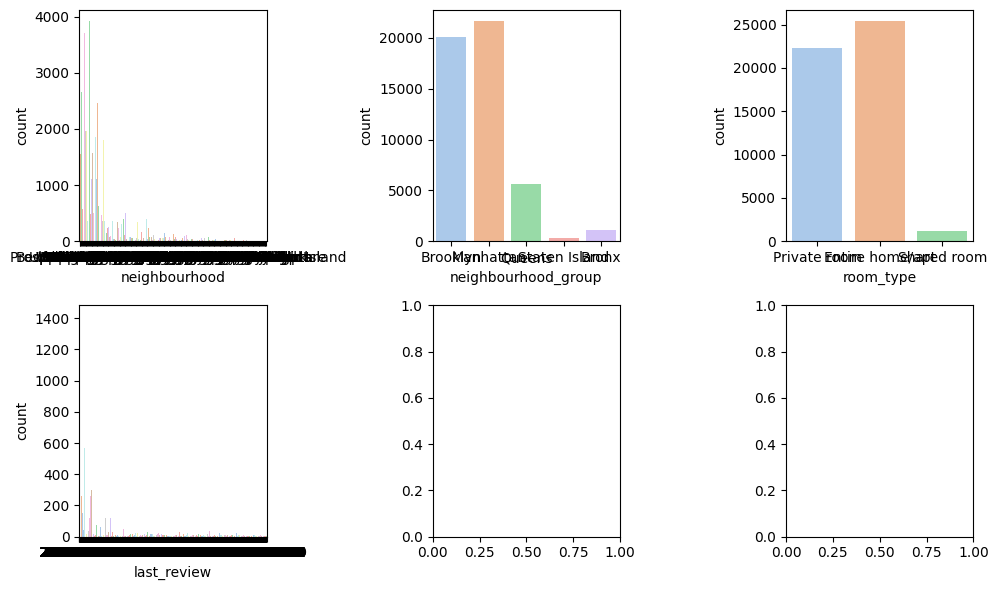

In [76]:
#grafico sobre variables categoricas
fig, axis = plt.subplots(2, 3, figsize = (10, 6))

sns.countplot(ax = axis[0, 0], data = df, x = "neighbourhood", palette='pastel', hue= "neighbourhood", legend=False)
sns.countplot(ax = axis[0, 1], data = df, x = "neighbourhood_group", palette='pastel', hue= "neighbourhood_group", legend=False)
sns.countplot(ax = axis[0, 2], data = df, x = "room_type", palette='pastel', hue= "room_type", legend=False)
sns.countplot(ax = axis[1, 0], data = df, x = "last_review", palette='pastel', hue= "last_review", legend=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot 
plt.show()

/tmp/ipykernel_984/222370905.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[1, 0], data=df, x="last_review", palette='pastel', dodge=False)


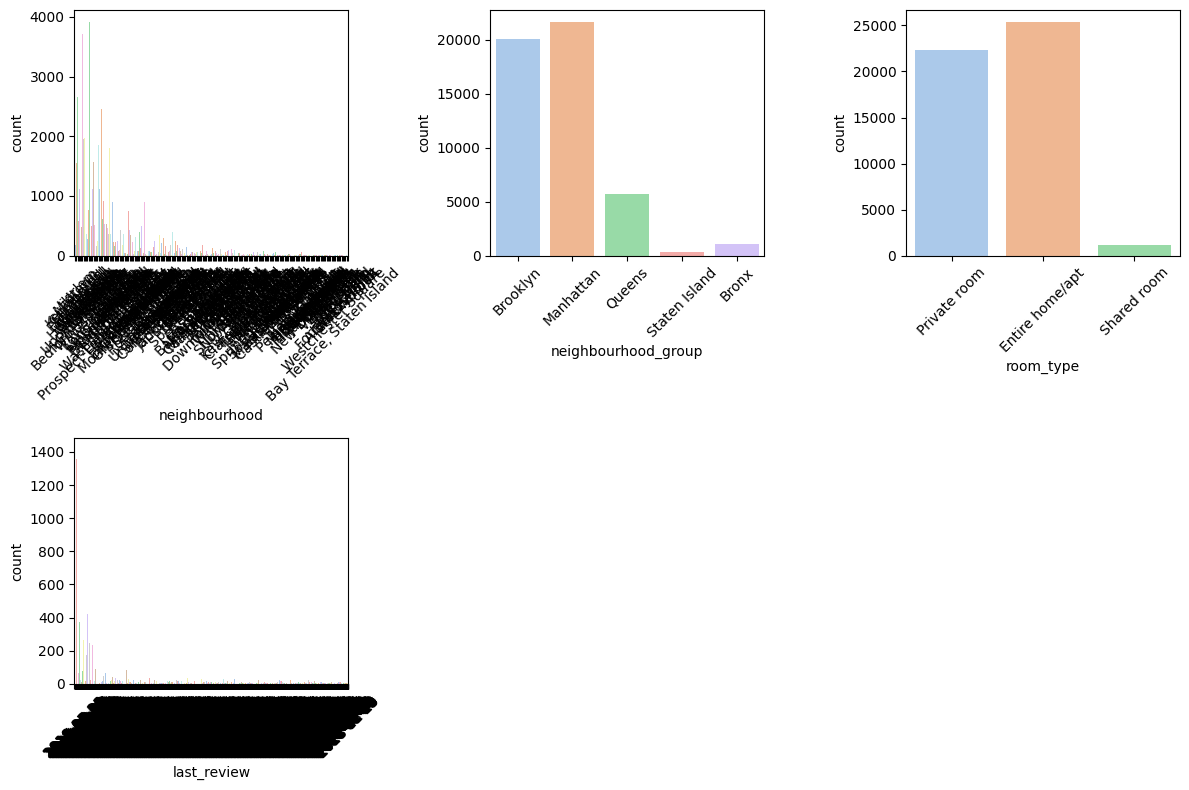

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(12, 8))

sns.countplot(ax=axis[0, 0], data=df, x="neighbourhood", palette='pastel', hue="neighbourhood", dodge=False)
axis[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(ax=axis[0, 1], data=df, x="neighbourhood_group", palette='pastel', hue="neighbourhood_group", dodge=False)
axis[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(ax=axis[0, 2], data=df, x="room_type", palette='pastel', hue="room_type", dodge=False)
axis[0, 2].tick_params(axis='x', rotation=45)

sns.countplot(ax=axis[1, 0], data=df, x="last_review", palette='pastel', dodge=False)
axis[1, 0].tick_params(axis='x', rotation=45)

# Eliminar los subplots vacíos (si no se usan todas las celdas de la cuadrícula)
for ax in axis[1, 1:]:
    ax.remove()

plt.tight_layout()

plt.show()


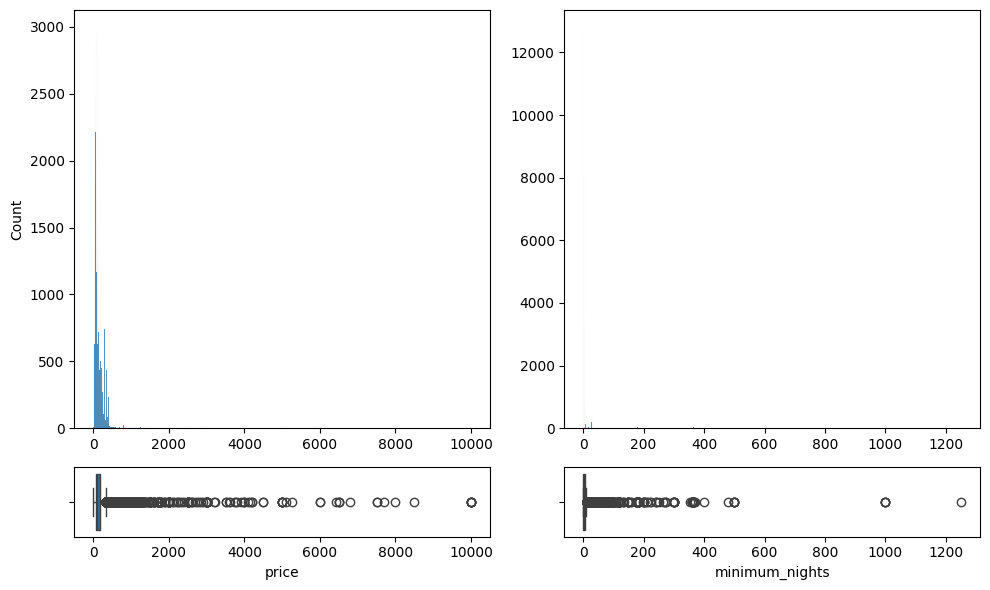

In [78]:
#numericas
fig, axis = plt.subplots(2, 2, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "price")

sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

hay lugares que pueden salir realmente muy caro y te muenden exijir gran cantidad de noches

In [79]:

# Identificar las columnas numéricas del DataFrame automáticamente
variables = df.select_dtypes(include='number').columns.tolist()

# Aplicar la función
outliers_detectados, limites_detectados = detectar_outliers_iqr(df, variables)

# Mostrar resumen
for var, outliers in outliers_detectados.items():
    print(f"\nVariable: {var}")
    print(f"Límite inferior (lower bound): {limites_detectados[var]['lower_bound']}")
    print(f"Límite superior (upper bound): {limites_detectados[var]['upper_bound']}")
    print(f"Número de valores atípicos: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Ejemplo de valores atípicos:\n{outliers.head()}")  # Mostrar solo los primeros valores
    else:
        print("No se encontraron valores atípicos.")



Variable: price
Límite inferior (lower bound): -90.0
Límite superior (upper bound): 334.0
Número de valores atípicos: 2972
Ejemplo de valores atípicos:
61     375
85     800
103    500
114    350
121    400
Name: price, dtype: int64

Variable: minimum_nights
Límite inferior (lower bound): -5.0
Límite superior (upper bound): 11.0
Número de valores atípicos: 6607
Ejemplo de valores atípicos:
6     45
14    90
29    14
36    60
45    29
Name: minimum_nights, dtype: int64

Variable: number_of_reviews
Límite inferior (lower bound): -33.5
Límite superior (upper bound): 58.5
Número de valores atípicos: 6021
Ejemplo de valores atípicos:
3    270
5     74
7    430
8    118
9    160
Name: number_of_reviews, dtype: int64

Variable: reviews_per_month
Límite inferior (lower bound): -2.555
Límite superior (upper bound): 4.765000000000001
Número de valores atípicos: 1793
Ejemplo de valores atípicos:
471     6.70
534     6.62
553     7.14
1103    5.27
1125    5.12
Name: reviews_per_month, dtype: floa

In [80]:
# Función para detectar valores atípicos usando IQR y mostrar límites
def detectar_outliers_iqr(data, variables):
    outliers = {}
    limites = {}  # Diccionario para almacenar límites
    for var in variables:
        Q1 = data[var].quantile(0.25)  # Primer cuartil
        Q3 = data[var].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1                 # Rango intercuartílico
        lower_bound = Q1 - 1.5 * IQR  # Límite inferior
        upper_bound = Q3 + 1.5 * IQR  # Límite superior

        # Guardar límites
        limites[var] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}

        # Filtrar valores atípicos
        outliers[var] = data[(data[var] < lower_bound) | (data[var] > upper_bound)][var]

    return outliers, limites

# Aplicar la función
outliers_detectados, limites_detectados = detectar_outliers_iqr(df, variables)

# Mostrar resumen
for var, outliers in outliers_detectados.items():
    print(f"\nVariable: {var}")
    print(f"Límite inferior (lower bound): {limites_detectados[var]['lower_bound']}")
    print(f"Límite superior (upper bound): {limites_detectados[var]['upper_bound']}")
    print(f"Número de valores atípicos: {len(outliers)}")
    print(f"Valores atípicos:\n{outliers.values}")


Variable: price
Límite inferior (lower bound): -90.0
Límite superior (upper bound): 334.0
Número de valores atípicos: 2972
Valores atípicos:
[375 800 500 ... 800 350 345]

Variable: minimum_nights
Límite inferior (lower bound): -5.0
Límite superior (upper bound): 11.0
Número de valores atípicos: 6607
Valores atípicos:
[45 90 14 ... 29 20 20]

Variable: number_of_reviews
Límite inferior (lower bound): -33.5
Límite superior (upper bound): 58.5
Número de valores atípicos: 6021
Valores atípicos:
[270  74 430 ...  65 156  82]

Variable: reviews_per_month
Límite inferior (lower bound): -2.555
Límite superior (upper bound): 4.765000000000001
Número de valores atípicos: 1793
Valores atípicos:
[6.7  6.62 7.14 ... 6.   7.   5.  ]

Variable: calculated_host_listings_count
Límite inferior (lower bound): -0.5
Límite superior (upper bound): 3.5
Número de valores atípicos: 7081
Valores atípicos:
[6 4 6 ... 6 5 6]

Variable: availability_365
Límite inferior (lower bound): -340.5
Límite superior (uppe

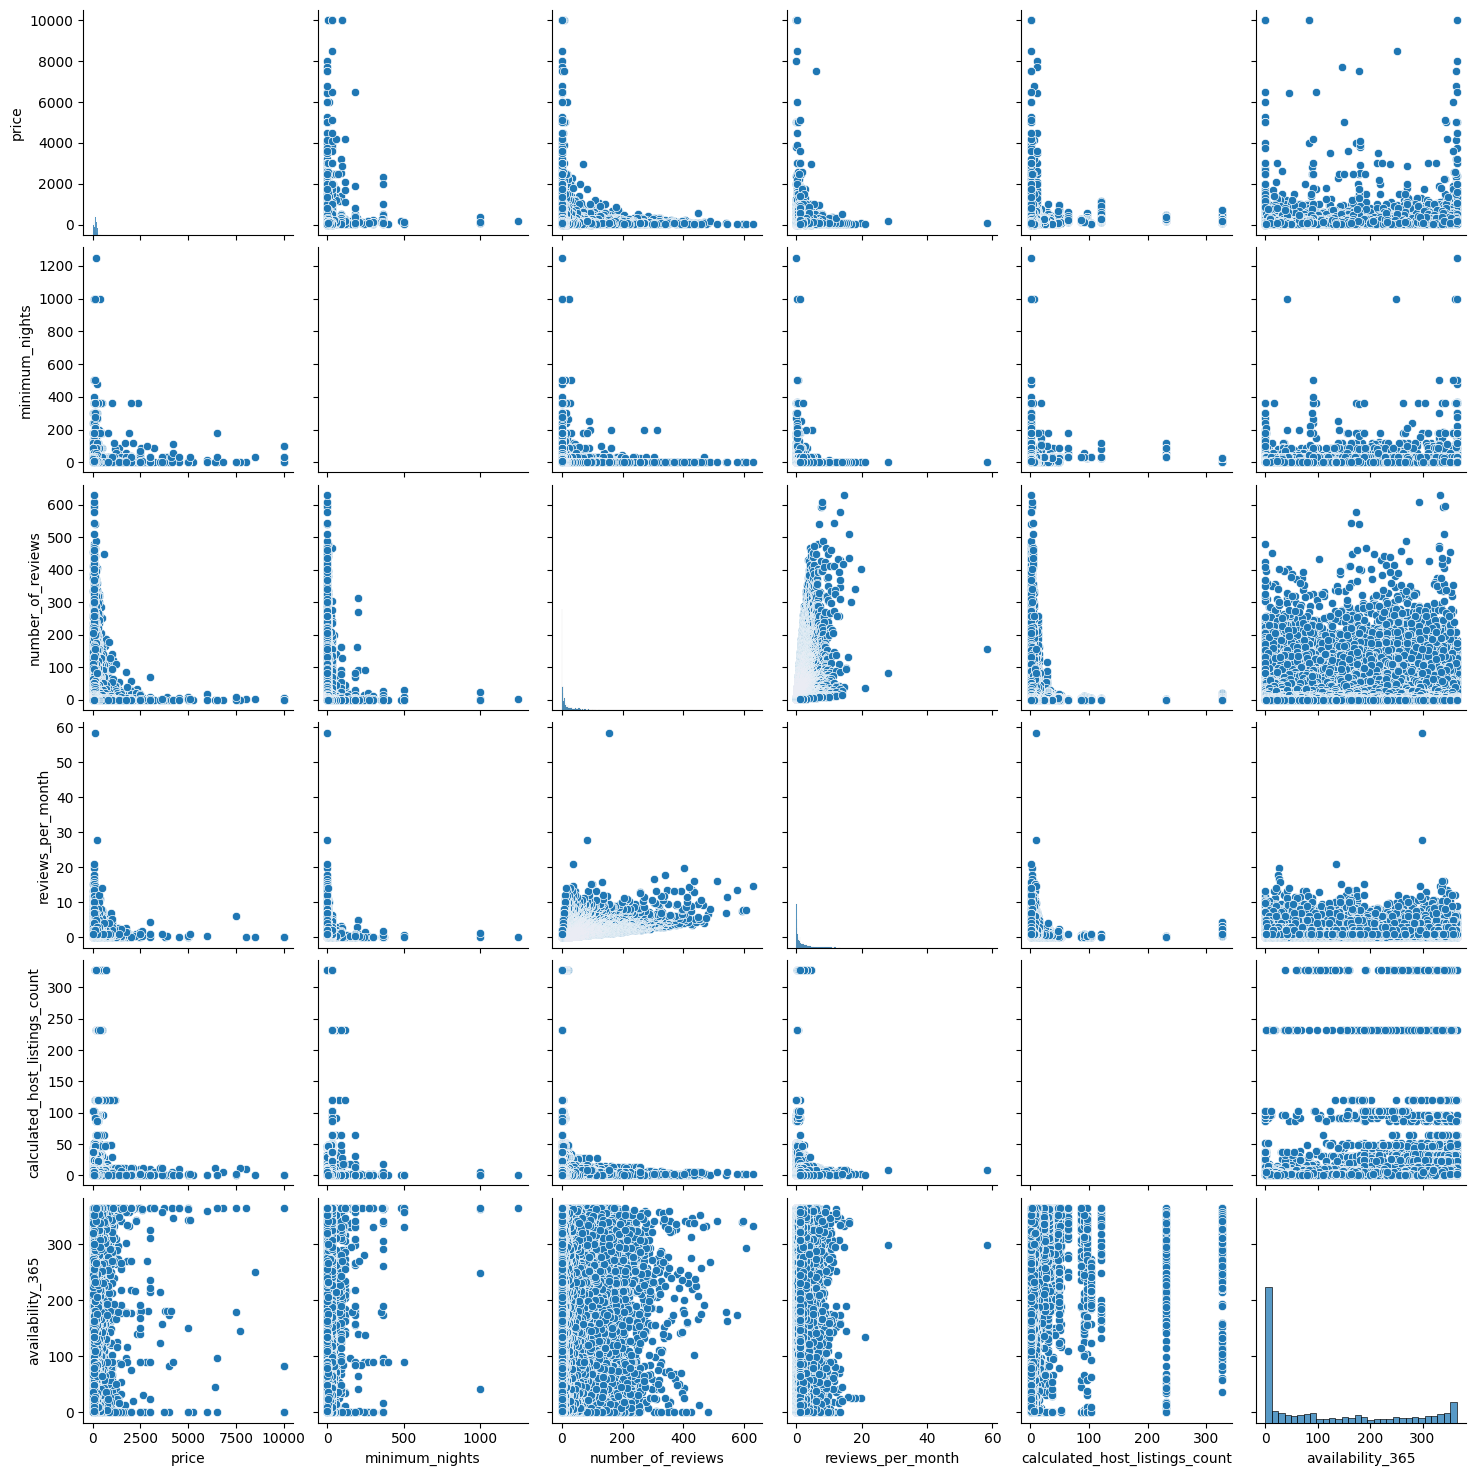

In [81]:
sns.pairplot(data = df)

la relacion mas clara que encontramos es que las de precio mas elevados tienen menor numeros de reviews lo cual tiene logica ya que menos gente tiene acceso a pagar elevadas suma de dinero.

In [82]:
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]
df["room_type"] = pd.factorize(df["room_type"])[0]
df["last_review"] = pd.factorize(df["last_review"])[0]

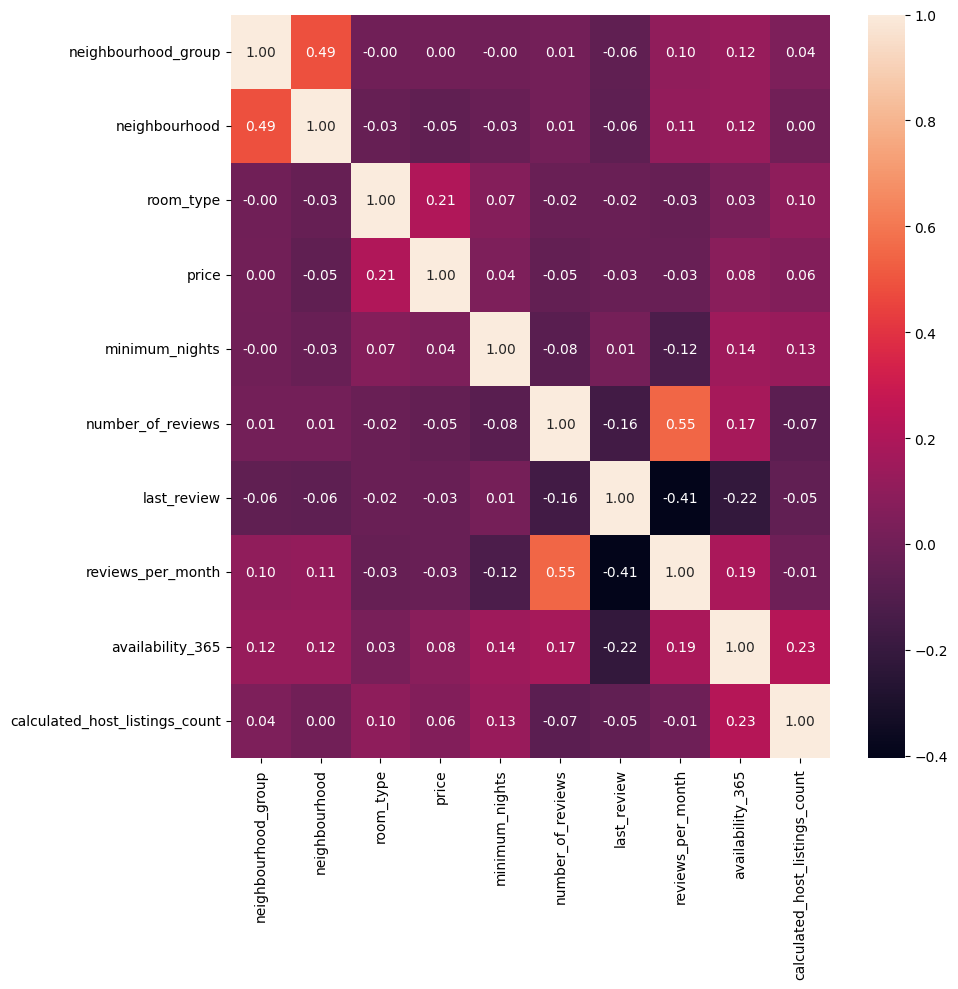

In [83]:
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(df[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights", "number_of_reviews", "last_review", "reviews_per_month","availability_365","calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

podemos ver relaciones entre las reviews. Tambien una relacion entre price y room_type

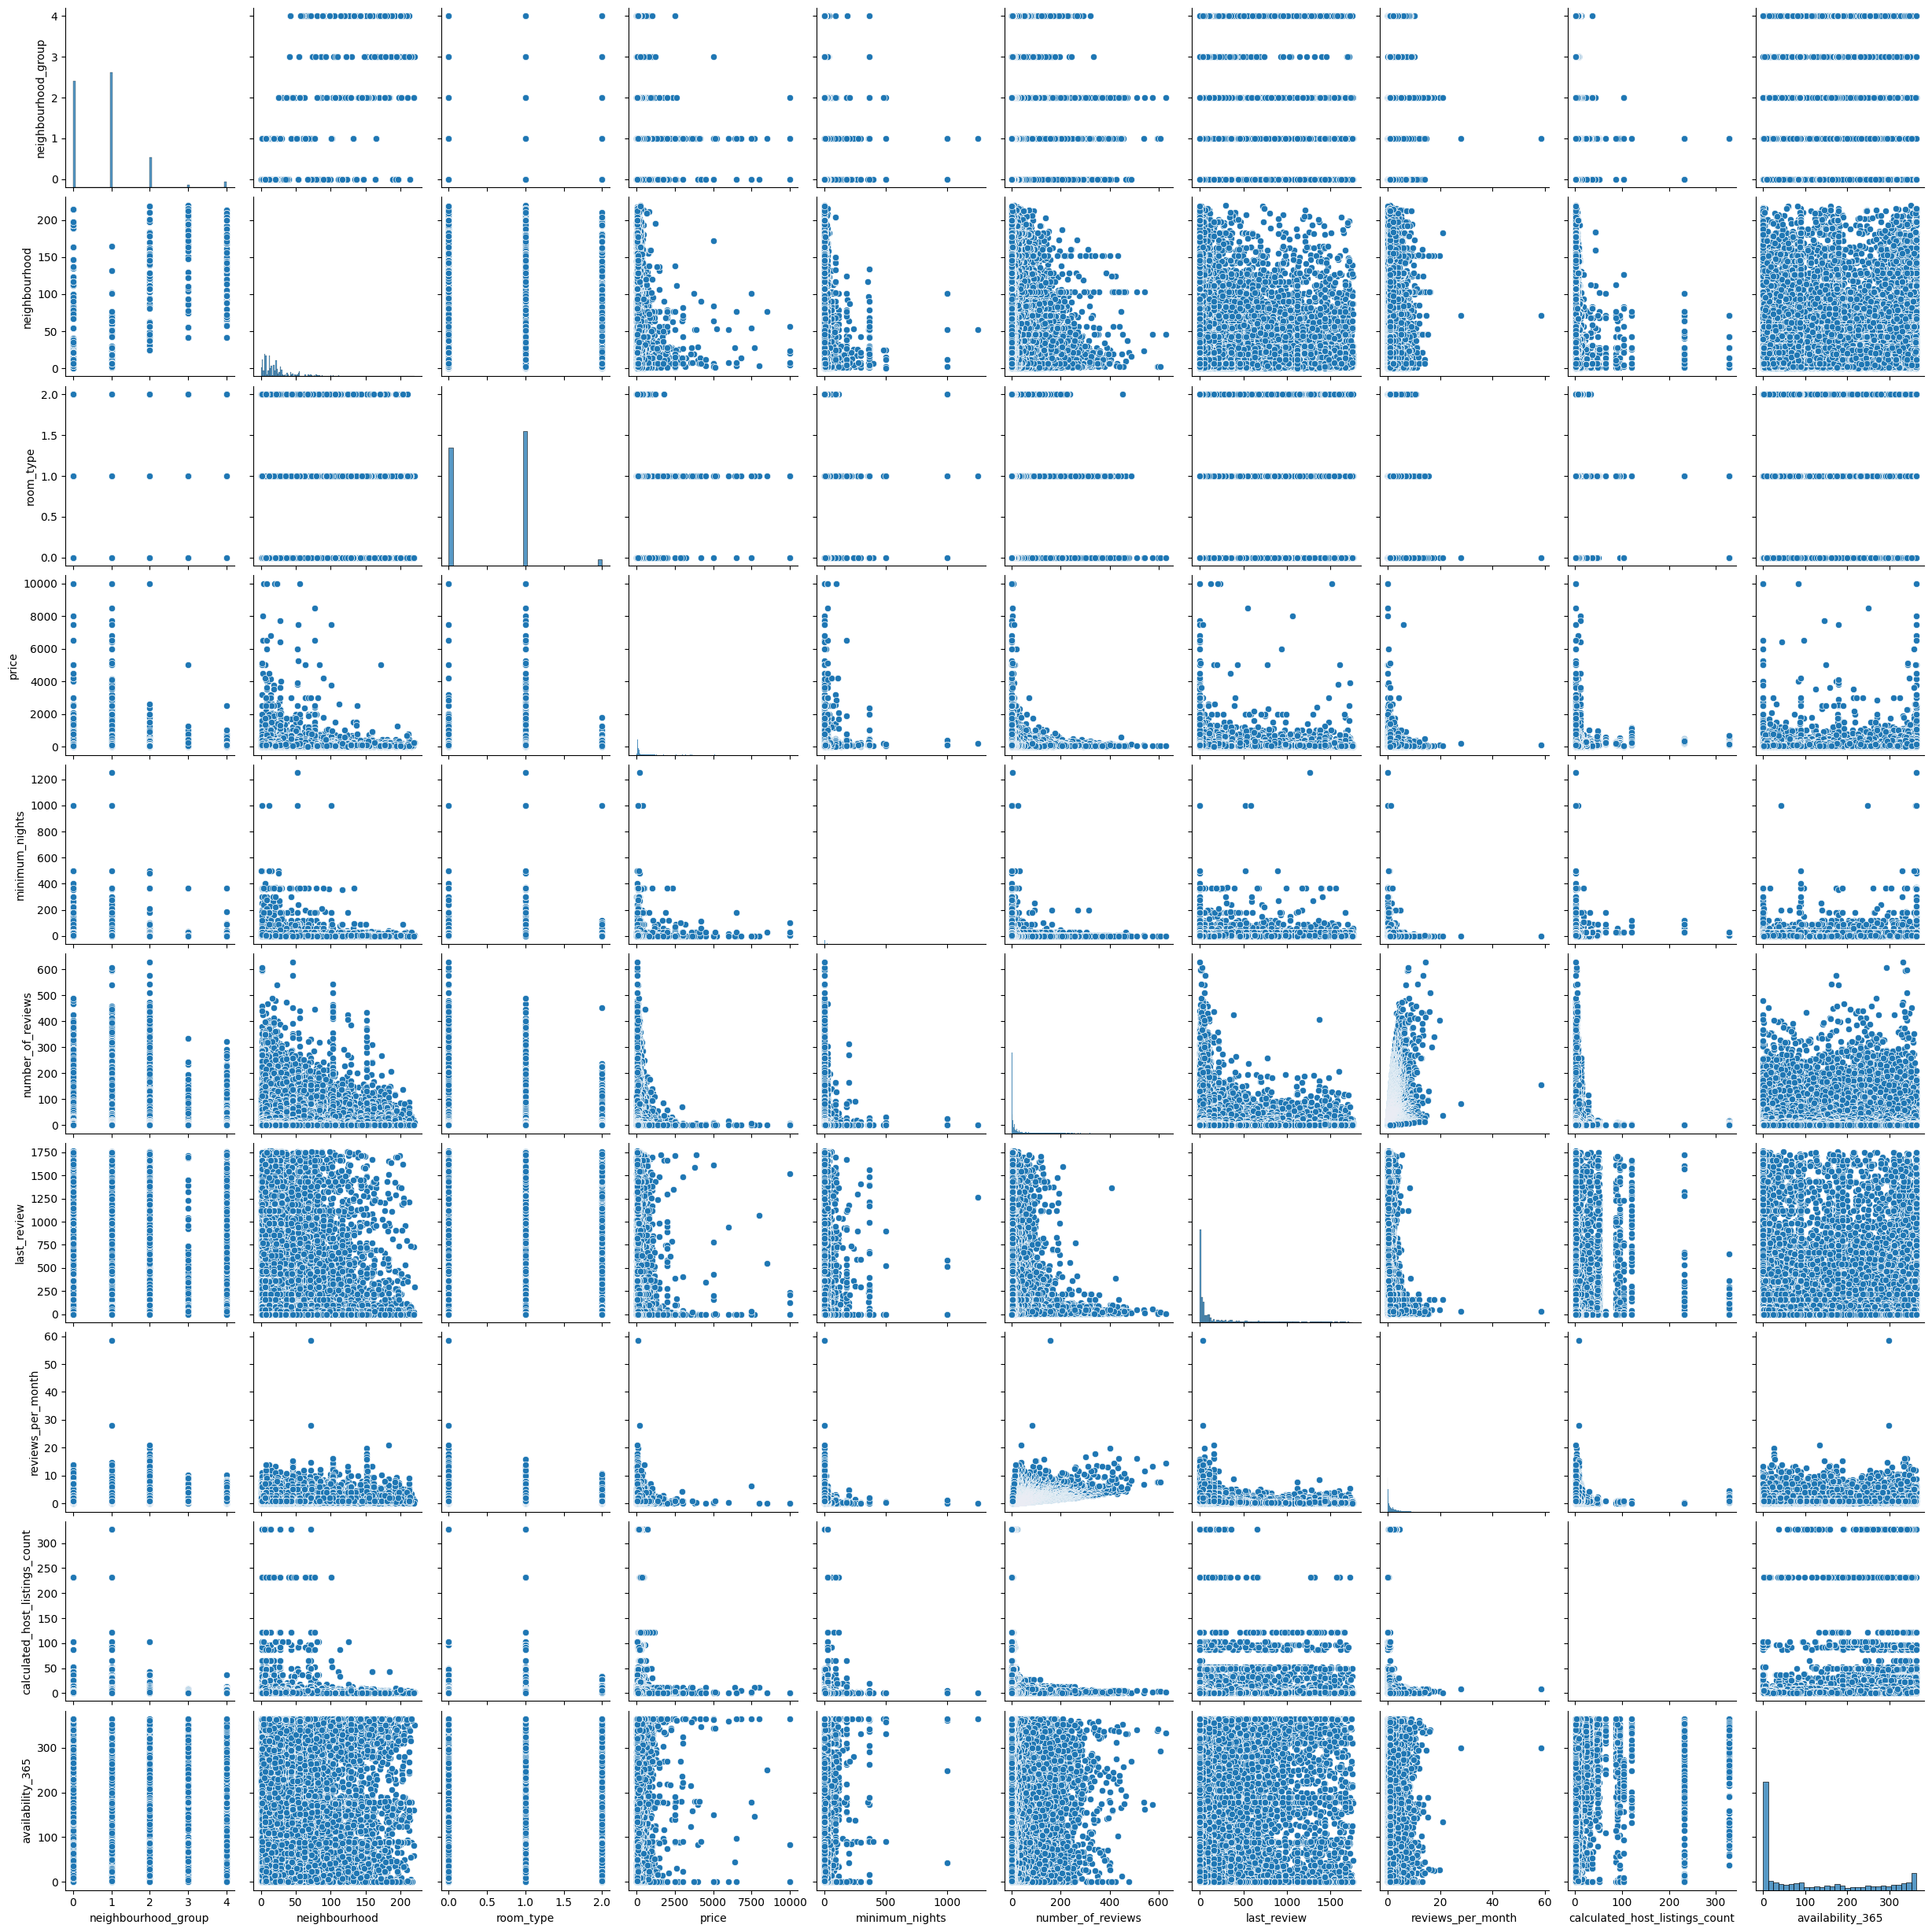

In [84]:
# relaciones todos con todos
sns.pairplot(data = df)

Podemos observar una pequena relacion entre  price y neighbourhood

In [85]:
df.describe()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,0.786911,29.888782,0.567113,152.720687,7.029962,23.274466,260.169874,1.373221,7.143982,112.781327
std,0.844386,34.676634,0.541249,240.154170,20.510550,44.550582,423.262882,1.680442,32.952519,131.622289
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.010000,1.000000,0.000000
25%,0.000000,7.500000,0.000000,69.000000,1.000000,1.000000,6.000000,0.190000,1.000000,0.000000
50%,1.000000,19.000000,1.000000,106.000000,3.000000,5.000000,46.000000,0.720000,1.000000,45.000000
75%,1.000000,37.000000,1.000000,175.000000,5.000000,24.000000,320.000000,2.020000,2.000000,227.000000
max,4.000000,220.000000,2.000000,10000.000000,1250.000000,629.000000,1763.000000,58.500000,327.000000,365.000000


In [86]:
df.isnull().sum().sort_values(ascending=False)


reviews_per_month                 10052
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
minimum_nights                        0
price                                 0
number_of_reviews                     0
last_review                           0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [87]:
df = df.dropna(axis=1)


In [88]:
df.isnull().sum().sort_values(ascending=False)


neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [90]:
# Dividimos el conjunto de datos en muestras de train y test

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X = df.drop("price", axis = 1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape

(39116, 8)

In [91]:
import os

# Crear la carpeta ./data/processed si no existe
processed_dir = "./data/processed"
os.makedirs(processed_dir, exist_ok=True)


In [92]:
import pandas as pd

# Supongamos que 'df' es tu DataFrame procesado
output_file = os.path.join(processed_dir, "processed_data.csv")
df.to_csv(output_file, index=False)  # Guardar sin índices
print(f"Datos guardados en: {output_file}")


Datos guardados en: ./data/processed/processed_data.csv
